In [1]:
import pandas as pd
from datetime import datetime
from zoe import cases, query, pickle, find_previous, plot_study, plot_study_evolution

In [2]:
uk_active_cases = query("SELECT * FROM uk_active_cases", index='date')
uk_active_cases.index = pd.to_datetime(uk_active_cases.index, format='%Y%m%d')
uk_active_cases

,cartodb_id,the_geom,the_geom_webmercator,corrected_covid_positive
date,,,,
2020-06-12,45502,None,None,85803.193752
2020-06-13,45503,None,None,79693.711487
2020-06-14,45504,None,None,74027.893773
2020-06-15,45505,None,None,68689.645663
2020-06-16,45506,None,None,63932.593317
...,...,...,...,...
2021-04-04,45798,None,None,54741.538180
2021-04-05,45799,None,None,51994.878628
2021-04-06,45800,None,None,49426.968810


In [3]:
curr_date = uk_active_cases.index.max()
print(pickle(uk_active_cases, 'uk_active_cases', curr_date))

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-04-08_2021-04-08-16-30.pickle


In [4]:
prev_date, prev_uk_active_cases = find_previous(curr_date)

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-04-07_2021-04-07-16-32.pickle


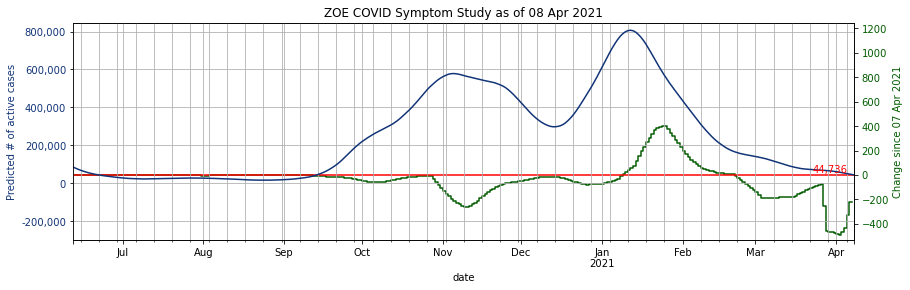

In [5]:
plot_study(curr_date, prev_date, uk_active_cases, prev_uk_active_cases)

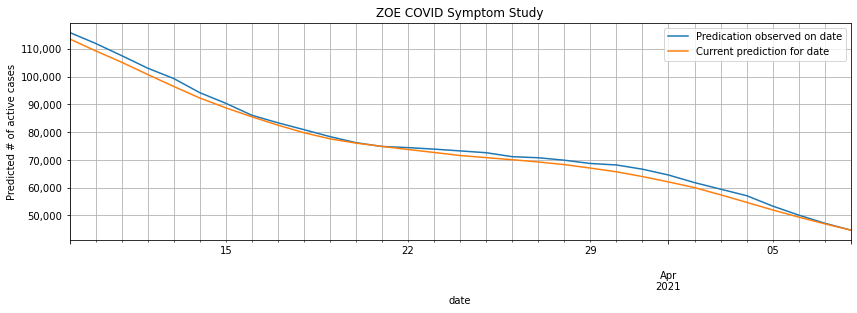

In [6]:
plot_study_evolution(curr_date, days=30)

In [7]:
prevalence_map = query("SELECT * FROM prevalence_map")
prevalence_map['percentage'] = prevalence_map['percentage'].astype(float)

In [8]:
for_date, = prevalence_map['data_status'].unique()
print(pickle(prevalence_map, 'prevalence_map', datetime.strptime(for_date, '%H:%M:%S %d-%m-%Y')))

/Users/chris/coronavirus/data/zoe_prevalence_map_2021-04-08_2021-04-08-16-31.pickle


In [9]:
prevalence_map[['lad16nm', 'lad16cd', 'percentage']].sort_values('percentage', ascending=False)[:10]

,lad16nm,lad16cd,percentage
376,South Lanarkshire,S12000029,0.657128
285,South Tyneside,E08000023,0.423299
146,Staffordshire Moorlands,E07000198,0.343058
347,Hammersmith and Fulham,E09000013,0.233148
197,South Norfolk,E07000149,0.217385
270,Salford,E08000006,0.212985
240,Wakefield,E08000036,0.211154
204,Selby,E07000169,0.178049
239,Leeds,E08000035,0.173884
324,East Dunbartonshire,S12000045,0.170314
